# Exploring Patterns in Passenger Names of the Titanic 
<a id="start"></a>
In this notebook, I will employ various text analysis techniques to uncover trends and anomalies within the names of the passengers. My exploration will include the creation of word clouds to visualize the frequency and prominence of names, the examination of naming patterns that reflect the social customs of the time, and the analysis of titles and honorifics that may indicate social status, gender, and marital relationships.


| Attribute | Details |
|-----------|---------|
| **Author** | **`Muhammad Bilal Khan`** |
| **Kaggle** | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/devbilalkhan) |
| **Twitter** | [![Twitter Badge](https://img.shields.io/badge/Twitter-%23000000.svg?style=for-the-badge&logo=Twitter&logoColor=white)](https://twitter.com/devbilalkhan) |
| **GitHub** | [![GitHub Badge](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/devbilalkhan) |
| **Email** | [![Outlook Badge](https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=for-the-badge&logo=microsoft-outlook&logoColor=white)](mailto:bilal.khan@live.com) |

## Dataset Overview

The Titanic dataset is a classic and very famous dataset used for machine learning and data analysis. It contains information about the passengers, formatted into two sets: training and test data. The training set includes passenger information along with the survival outcome, which we'll use to train our machine learning models. The test set contains passenger information but without the survival outcome, and it's used to test the performance of our trained models.

Here are the key columns in the dataset along with a brief description of each:

- `Survived`: Indicates if a passenger survived (1) or not (0).
- `Pclass`: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name`: Passenger's name.
- `Sex`: Passenger's sex.
- `Age`: Passenger's age in years.
- `SibSp`: Number of siblings/spouses aboard the Titanic.
- `Parch`: Number of parents/children aboard the Titanic.
- `Ticket`: Ticket number.
- `Fare`: Passenger fare.
- `Cabin`: Cabin number.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


## Acknowledgements

I would like to acknowledge the creators of the Titanic dataset for making it publicly available and a special thanks to the Kaggle platform for hosting the Titanic Machine Learning competition. 

I would like to extend my gratitude to [Gabriel Preda](https://www.kaggle.com/gpreda) for his invaluable contributions to the analysis of the Titanic dataset. Gabriel's notebook has been a guiding resource, demonstrating the power of thoughtful data analysis.

[Navigate to Conclusion ➡️](#conclusion)

In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_utils import inspect_frequent_values, inspect_missing_values, inspect_unique_values, display_custom_palette
import warnings
warnings.filterwarnings('ignore')


In [69]:
train_ds = pd.read_csv('data/train.csv')
test_ds = pd.read_csv('data/test.csv')

# Insights from Passenger Names

First I am going to merge the two datasets together to  to observe overall patterns and statistics.

In [70]:
df = pd.concat([train_ds, test_ds], axis=0, sort=False)

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In the next step, I am going to extract meaningful information from the names of the passengers. I am going to split names into their titles, given names, last names and maiden names if any. 

In [72]:
df['title'] = df["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df['maiden_name'] = df["Name"].apply(lambda name: name.replace("\"", "").split('(')[1].split(')')[0] if '(' in name and ')' in name else None)
df['given_name'] = df["Name"].apply(lambda name: name.split('.')[1].strip().split("(")[0].strip() if '(' in name else name.split('.')[1].strip())
df['last_name'] = df["Name"].apply(lambda name: name.split(',')[0])

Let's inspect the new features extracted.

In [73]:
df[['title', 'given_name', 'last_name', 'maiden_name','Name', 'Ticket', 'Survived']].sort_values(by='Ticket').head(30)

,title,given_name,last_name,maiden_name,Name,Ticket,Survived
504,Miss,Roberta,Maioni,None,"Maioni, Miss. Roberta",110152,1.0
257,Miss,Gladys,Cherry,None,"Cherry, Miss. Gladys",110152,1.0
759,the Countess,of,Rothes,Lucy Noel Martha Dyer-Edwards,"Rothes, the Countess. of (Lucy Noel Martha Dye...",110152,1.0
585,Miss,Ruth,Taussig,None,"Taussig, Miss. Ruth",110413,1.0
262,Mr,Emil,Taussig,None,"Taussig, Mr. Emil",110413,0.0
558,Mrs,Emil,Taussig,Tillie Mandelbaum,"Taussig, Mrs. Emil (Tillie Mandelbaum)",110413,1.0
110,Mr,Walter Chamberlain,Porter,None,"Porter, Mr. Walter Chamberlain",110465,0.0
475,Mr,George Quincy,Clifford,None,"Clifford, Mr. George Quincy",110465,0.0
335,Mr,John Edward,Maguire,None,"Maguire, Mr. John Edward",110469,NaN
158,Mr,John James,Borebank,None,"Borebank, Mr. John James",110489,NaN


## Observation - Unique Ticket Numbers

When examining the data above, I noticed instances of shared ticket numbers, suggesting that these individuals were likely traveling together. This pattern opens a window into the relationships between passengers, potentially indicating family ties or group travel. Here's what I observed about a few of these tickets:

**`Ticket number 110152`** was shared among three women: **`Miss Roberta Maioni`**, **`Miss Gladys Cherry`**, and **`The Countess of Rothes`** (Lucy Noel Martha Dyer-Edwards). Notably, they all possess titles that denote their unmarried status or nobility, and all three women survived the sinking. The Countess of Rothes, in particular, is historically noted for her commendable actions during the disaster.

For **`ticket number 110413`**, the passengers included **`Miss Ruth Taussig`**, **`Mr. Emil Taussig`**, and **`Mrs. Emil Taussig`** (née Tillie Mandelbaum). This ticket grouping likely represented a family, with the surname Taussig suggesting a spousal relationship between Mr. and Mrs. Taussig and a parental one with Miss Ruth Taussig. Tragically, only Mrs. Taussig and her daughter Ruth survived, while Mr. Taussig perished.

The case of **`ticket number 110465`**, held by **`Mr. Walter Chamberlain Porter`** and **`Mr. George Quincy Clifford`**, implies a different kind of association. Both men, perhaps friends or business associates, shared this ticket. Unfortunately, history records that neither survived the tragic event.

**`~Ticket number 110813`** belonged to **`Mrs. Frank Manley Warren`** (whose maiden name was Anna Sophia Atkinson) and **`Mr. Frank Manley Warren`**. This suggests a married couple was traveling together. While records confirm Mrs. Warren's survival, Mr. Warren's fate is not clearly documented, leaving a gap in the story of this couple.

Lastly, **`ticket number 111361`** was shared by **`Miss Jean Gertrude Hippach`** and **`Mrs. Louis Albert Hippach`** (Ida Sophia Fischer), which strongly indicates a mother-daughter relationship. It is heartening to note that both managed to survive the sinking of the Titanic.

These shared ticket numbers not only give us a glimpse into the traveling arrangements but also reflect the deep personal stories aboard the Titanic. The survival outcomes offer a somber reminder of the disaster's impact on families and groups within the ship's microcosm.


# 11-Member Family on the Titanic

In [97]:
# find ticket number that has the most value count
ticket_counts = df['Ticket'].value_counts().head()
ticket_counts

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: count, dtype: int64

The most value count ticket number is **`CA. 2343`**

In [76]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,maiden_name,given_name,last_name
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Master,None,Thomas Henry,Sage
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,None,Constance Gladys,Sage
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,None,Frederick,Sage
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,None,George John Jr,Sage
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,None,Stella Anna,Sage
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,None,Douglas Bullen,Sage
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,None,"Dorothy Edith ""Dolly""",Sage
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,None,Ada,Sage
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,Mr,None,John George,Sage
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,Master,None,William Henry,Sage


## Observations
It seems like a large family with 11-member family were travelling. The family consisting of two parents and nine children, with `five boys and four girls`, experienced a tragedy, with only two potentially surviving. The ages of the children are mostly unknown, except for one `14.5-year-old` boy. Three of the boys were considered adults, as indicated by the title `"Mr."` Of the family, it is confirmed that 9 out of the 11 members did not survive.

# World Cloud Analysis

In [93]:
from wordcloud import WordCloud

def generate_wordcloud(df, column, title):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = None,
                          min_font_size = 10).generate(' '.join(df[column].dropna().values))

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title, size=20)
    plt.tight_layout(pad = 0)
    plt.show()

# Given Names of the Titanic Passengers

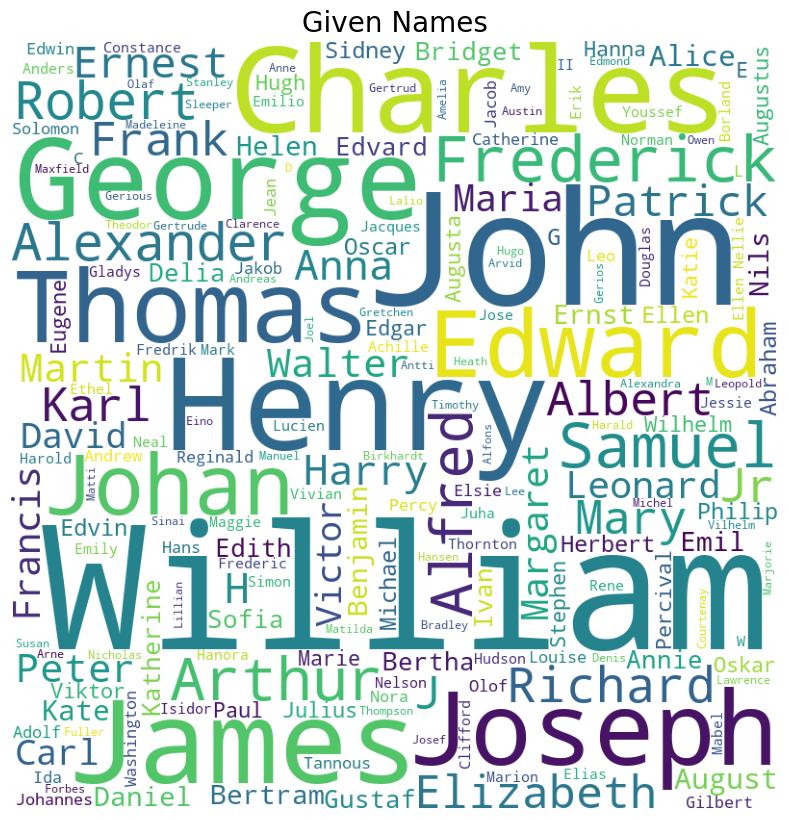

In [80]:
generate_wordcloud(df, 'given_name', "Given Names")

# Given Names of the Titanic Female Passengers

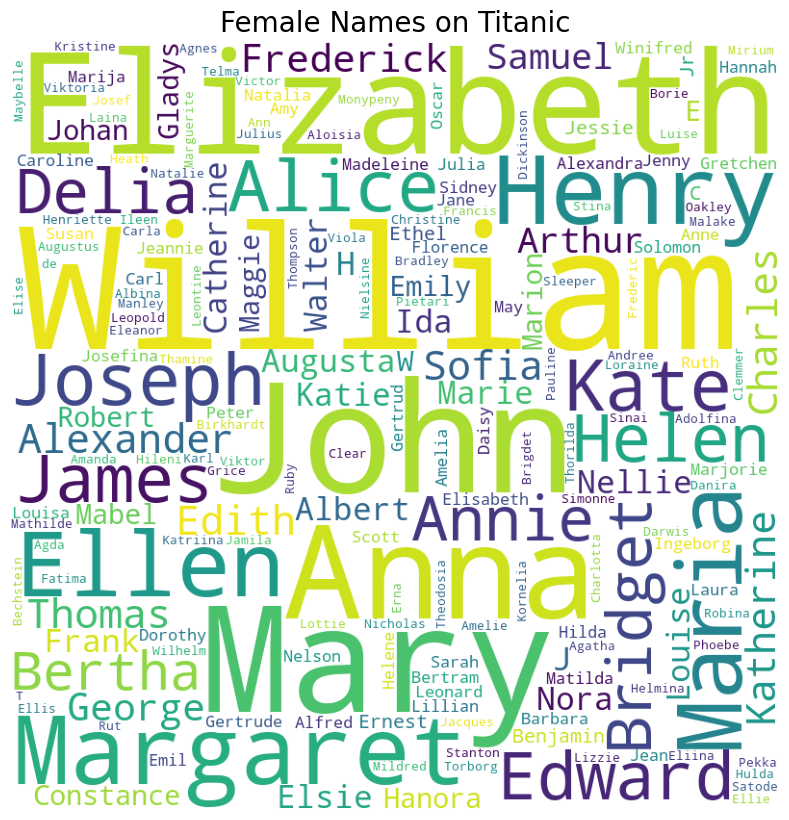

In [81]:
generate_wordcloud(df[df["Sex"]=="female"], "given_name", "Female Names on Titanic")

## Why Are There Male Names in the Female Given Names?

For example, let's have a look at the ticket number `250651`. In reviewing the names of female passengers, I've spotted a curious pattern: some of the women are listed with men's names. This prompts the question: was it common back then for women to be identified by their husband's names? For instance, when we see "`Lahtinen, Mrs. William (Anna Sylfven),`" this doesn't mean her name is William. Instead, it tells us that she is married to "`Lahtinen, Rev. William`," and both are traveling on the same ticket.

In [92]:
df[df["Ticket"].str.contains("250651")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,maiden_name,given_name,last_name
312,313,0.0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0,NaN,S,Mrs,Anna Sylfven,William,Lahtinen
149,1041,NaN,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0,NaN,S,Rev,None,William,Lahtinen


# Given Names of the Titanic Male Passengers

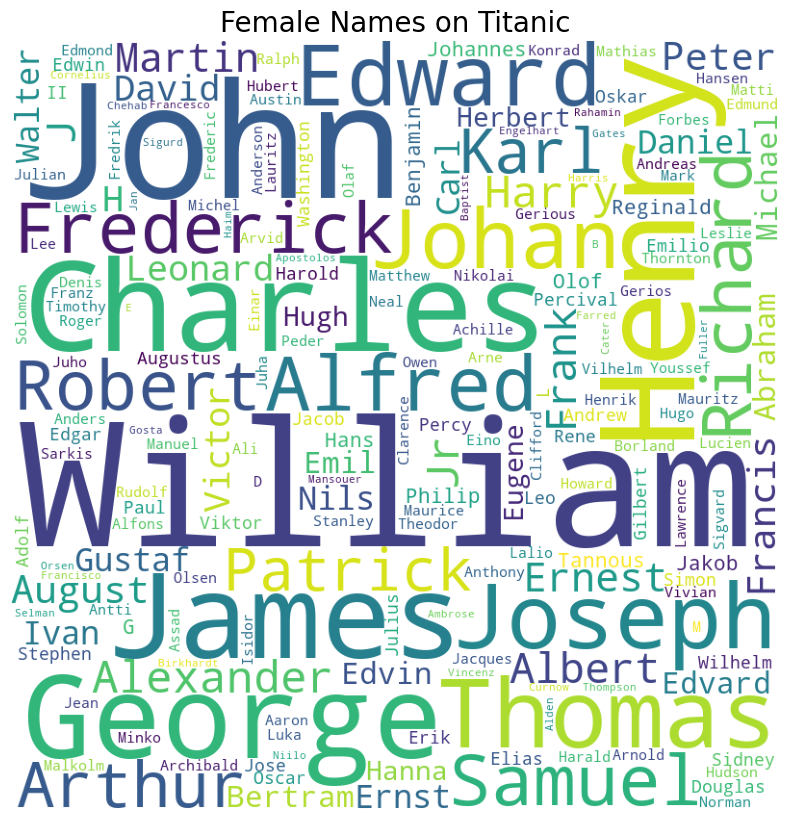

In [95]:
generate_wordcloud(df[df["Sex"]=="male"], "given_name", "Female Names on Titanic")

# Last Names of the Titanic Passengers

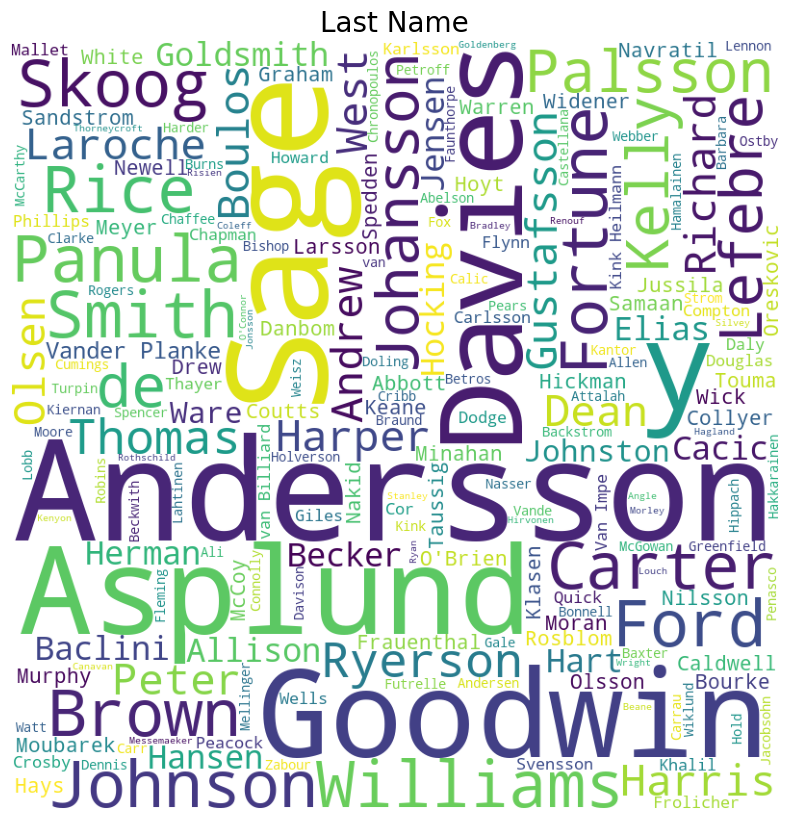

In [83]:
generate_wordcloud(df, 'last_name', 'Last Name')

# Given Names of the Titanic Girls Passengers with Titles Miss and Mlle

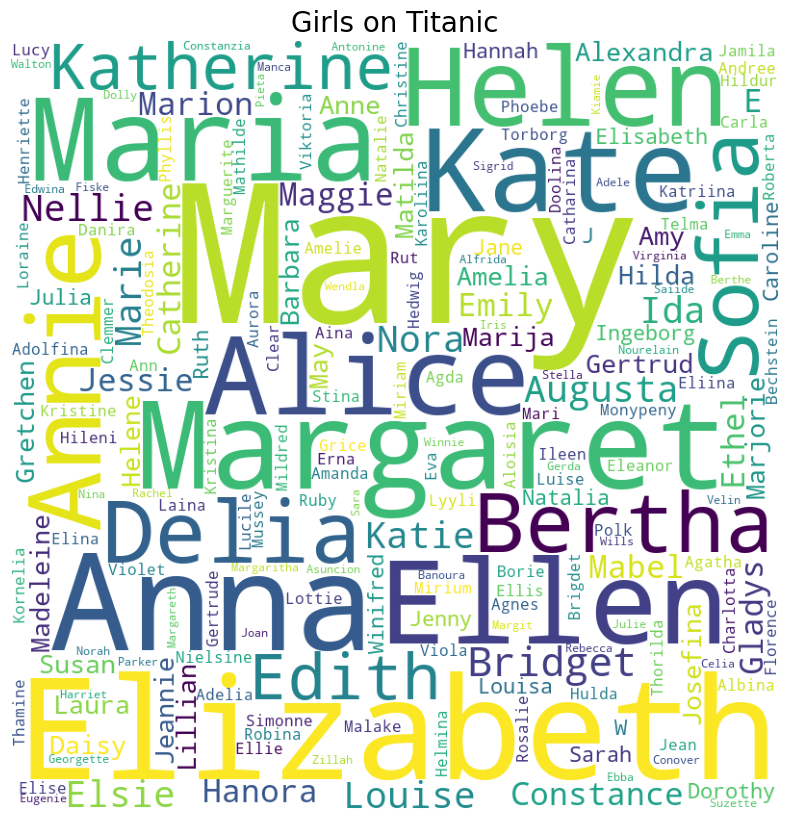

In [84]:
generate_wordcloud(df[(df["title"] == "Miss") | (df["title"] == "Mlle")], 'given_name', "Girls on Titanic")

# Given Names of the Titanic Passengers with the Title Master

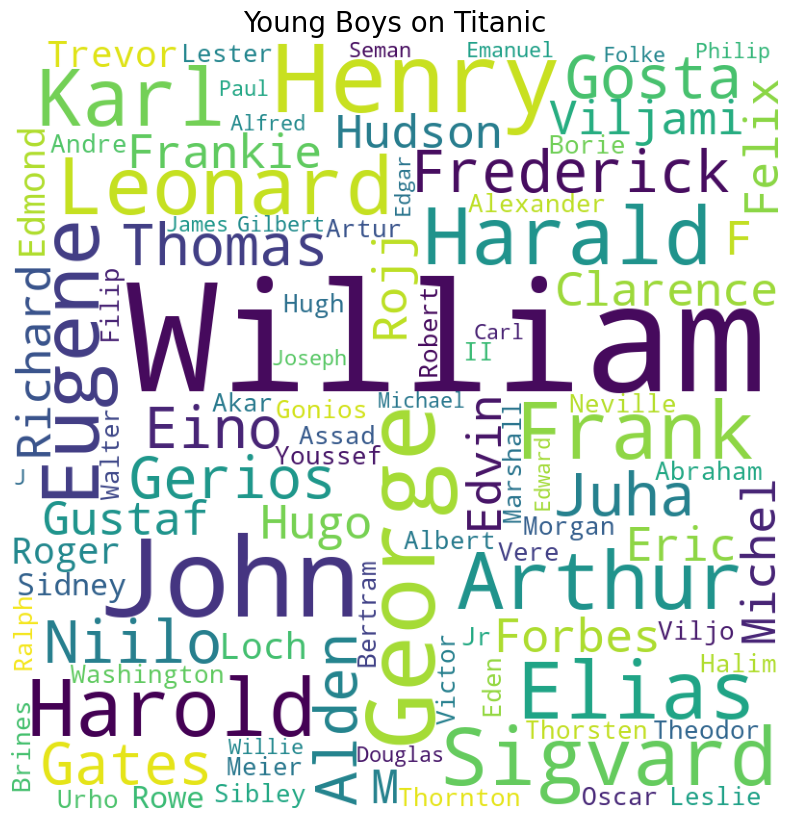

In [85]:
generate_wordcloud(df[df["title"] == "Master"], 'given_name', "Young Boys on Titanic")

# Conclusion:

In this notebook, I have engaged in a detailed exploration of the Titanic passenger list, focusing specifically on the names to uncover insights. My analysis has included creating word clouds to visualize the most frequent titles, given names, maiden names and lastnames for all passengers, as well as other breakdowns. This method has been effective in identifying naming patterns.

There is still more analysis that could be performed on this dataset. I've only scratched the surface. Further investigative work could, for instance, correlate names with survival rates, cabin categories, or points of embarkation. I leave these potential research paths to you, encouraging further exploration into the Titanic's passenger list, using this notebook as a starting point for deeper discovery.

[Navigate to Start ➡️](#start)